In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [71]:
#Read in the dataframe
df = pd.read_csv('Population_Data.csv')

#Make all Country Names uppercase for merging
df['Name'] = df["Name"].str.upper()
df = df.rename(columns={"Name": "Country"})

#Clean years, dropping missing, make the rest ints
df = df.dropna()
df["Year"] = df["Year"].astype(int)

#Deal with missing values, eliminate commas in large numbers
column_list = df.columns.tolist()
for col in column_list[4:]:
    df[col] = df[col].str.replace('--', '')
    df[col] = df[col].str.replace(',', '')
    
#Cast everything to floats
for col in column_list[4:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [72]:
#Do some sampling to make sure everything is as it should be
df.sample(10)

,Country,Region,GENC,Year,Area in Square Kilometers,Population,Male Population,Female Population,Annual Growth Rate %,Rate of Natural Increase,...,"Age 1-4 Mortality, Both Sexes","Age 1-4 Mortality, Males","Age 1-4 Mortality, Females","Under Age 5 Mortality, Both Sexes","Under Age 5 Mortality, Males","Under Age 5 Mortality, Females",Crude Death Rate,"Deaths, both sexes",Net Migration Rate,"Net international migrants, both sexes"
14283,NICARAGUA,"2012,Nicaragua",NI,2012,119990,5818040,2856404.0,2961636.0,1.39,1.59,...,3.4,3.7,3.1,22.9,25.4,20.2,4.7,27119.0,-2.0,-11877.0
7747,WALLIS AND FUTUNA,"1983,Wallis and Futuna",WF,1983,142,12398,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7093,BOLIVIA,"1981,Bolivia",BO,1981,1083301,5545224,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9994,SOUTH SUDAN,"1993,South Sudan",SS,1993,644329,4807785,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14791,TAJIKISTAN,"2014,Tajikistan",TJ,2014,141510,8304941,4164932.0,4140009.0,2.64,2.71,...,7.0,7.7,6.3,38.4,43.0,33.6,5.7,47427.0,-0.7,-5696.0
6159,ALGERIA,"1977,Algeria",DZ,1977,2381740,17152804,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15137,HONDURAS,"2016,Honduras",HN,2016,111890,8804368,4290263.0,4514105.0,1.09,1.72,...,2.1,2.4,1.9,19.0,21.3,16.6,4.7,40986.0,-6.3,-55039.0
12032,SAN MARINO,"2002,San Marino",SM,2002,61,28191,13661.0,14530.0,2.08,0.33,...,0.7,0.9,0.5,9.6,11.9,6.7,7.2,203.0,17.5,493.0
2591,GUATEMALA,"1961,Guatemala",GT,1961,107159,4231703,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16055,IRAN,"2020,Iran",IR,2020,1531595,84982541,43087120.0,41895421.0,1.09,1.12,...,2.4,2.4,2.4,17.8,18.9,16.6,5.1,436054.0,-0.3,-26000.0


In [73]:
#Count the missing values
missing_values_per_column = df.isna().sum()

print(missing_values_per_column)
print(len(df))
print("So approximately half the data is missing")
print("After 1990 approximately nothing is missing")


Country                                       0
Region                                        0
GENC                                          0
Year                                          0
Area in Square Kilometers                     0
Population                                    0
Male Population                            8066
Female Population                          8066
Annual Growth Rate %                       8098
Rate of Natural Increase                   8098
Population Density (People per Sq. Km.)       0
Dependency ratio                           8096
Youth dependency ratio                     8096
Old age dependency ratio                   8096
Median age, both sexes                     8097
Median age, females                        8097
Median age, males                          8097
Natural Increase                           8098
Sex ratio of the population                8096
Total Fertility Rate                       8109
Age-specific Fertility Rate 15-19       

In [74]:
#Save the Dataframe
df.to_csv('cleaned_population_data.csv')

In [75]:
#Alternate Dataset
df = pd.read_csv('undesa_pd_2019_world_fertility_dataset.csv')

#Only want to keep measures using TFR - Total Fertility Rate
df = df[df["Indicator"] == "TFR"]

#Change Country Name to uppercase
df['Country or Area'] = df["Country or Area"].str.upper()
df = df.rename(columns={"Country or Area": "Country"})

#Keep the columns we want
df = df[['Country', 'Date', 'Value']]

#Rename Value to Fertility Rate
df = df.rename(columns={"Value": "Fertility Rate"})

#Send Years to an int
df['Date'] = np.floor(df['Date']).astype(int)
df = df.rename(columns={"Date": "Year"})

#Figure out how many are missing
missing_values_per_column = df.isna().sum()
print("No missing values!, of course, not every country has every year")

#Get rid of duplicates
df = df.drop_duplicates(subset=['Year', 'Country'])


#Save the Dataframe
df.to_csv('cleaned_fertility_data.csv')

#Look at a sample
df.sample(5)


No missing values!, of course, not every country has every year


/var/folders/7p/c4gmwp116656n0kd4wjd0x0c0000gn/T/ipykernel_50722/1231151261.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('undesa_pd_2019_world_fertility_dataset.csv')


,Country,Year,Fertility Rate
22281,ECUADOR,2002,1.74
26411,FRENCH GUIANA,2009,3.50
11308,BURUNDI,2016,5.50
17355,COSTA RICA,1984,3.42
18683,CUBA,2004,1.54


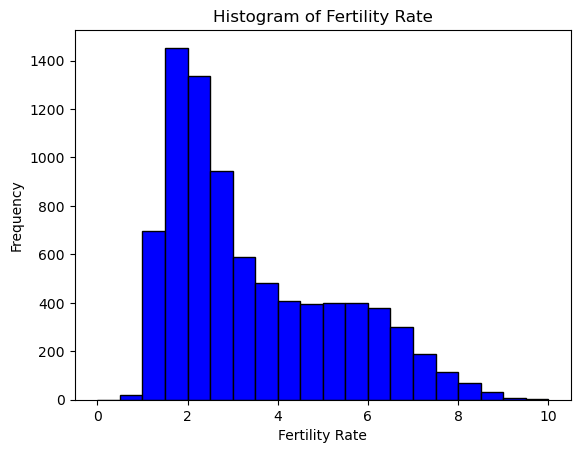

In [76]:
#Make a histogram of fertility rates to make sure it looks reasonable
column_data = df['Fertility Rate']
plt.hist(column_data, bins=np.linspace(0, 10, 21), color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Fertility Rate')

# Display the histogram
plt.show()


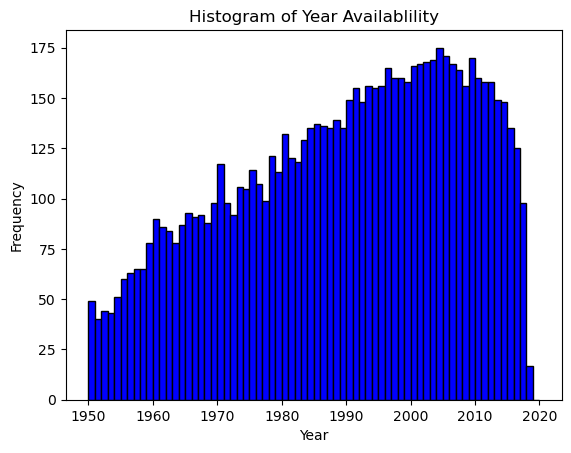

8216


In [77]:
#Now check which years tend to be available
#Make a histogram of fertility rates to make sure it looks reasonable
column_data = df['Year']
plt.hist(column_data, bins=np.linspace(1950, 2020, 71), color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Year Availablility')

# Display the histogram
plt.show()

print(len(df))


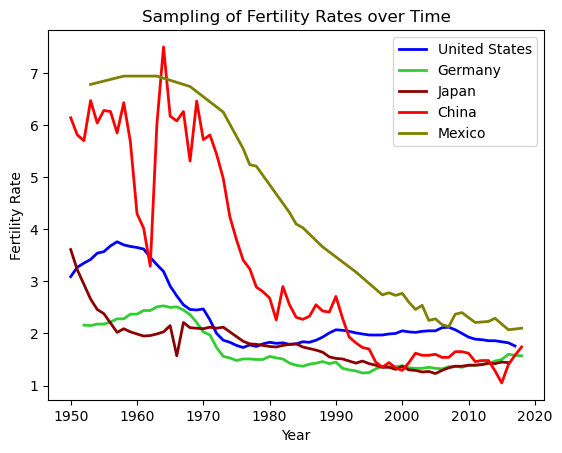

In [100]:
#Graph the fertility rates of several countries
us = df[df['Country'] == "UNITED STATES OF AMERICA"]
germany = df[df['Country'] == "GERMANY"]
japan = df[df['Country'] == "JAPAN"]
china = df[df['Country'] == "CHINA"]
mexico = df[df['Country'] == "MEXICO"]

# Plot the values of 'Column_B' for the filtered DataFrame
plt.plot(us["Year"], us['Fertility Rate'], label='United States', color='blue', lw=2)
plt.plot(germany["Year"], germany['Fertility Rate'], label='Germany', color='limegreen', lw=2)
plt.plot(japan["Year"], japan['Fertility Rate'], label='Japan', color='darkred', lw=2)
plt.plot(china["Year"], china['Fertility Rate'], label='China', color='red', lw=2)
plt.plot(mexico["Year"], mexico['Fertility Rate'], label='Mexico', color='olive', lw=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title("Sampling of Fertility Rates over Time")
plt.legend()

# Show the plot
plt.show()